<a href="https://colab.research.google.com/github/SpyroRock/U-net-reconstruction/blob/master/U_net_reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/SpyroRock/U-net-reconstruction
%cd U-net-reconstruction

Cloning into 'U-net-reconstruction'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 152 (delta 6), reused 15 (delta 5), pack-reused 136
Receiving objects: 100% (152/152), 196.02 MiB | 22.19 MiB/s, done.
Resolving deltas: 100% (78/78), done.
/content/U-net-reconstruction


In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 51.1MB 61kB/s 
     |████████████████████████████████| 307kB 47.2MB/s 
     |████████████████████████████████| 573kB 48.7MB/s 
     |████████████████████████████████| 3.3MB 55.8MB/s 
     |████████████████████████████████| 51kB 9.4MB/s 
     |████████████████████████████████| 3.3MB 53.8MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-cp36-none-any.whl size=29072 sha256=6e067881f88bf227d022284842581fd2e391552f9d0c575d6ebc2bcecefc05ca
  Stored in directory: /root/.cache/pip/wheels/d0/bb/c0/6aad88b38f6e46db048bed4cccb904a5897055a8ab6fbd4dfc
Successfully built keras-segmentation
ERROR: xarray 0.15.1 has requirement setuptools>=41.2, but you'll have setuptools 39.1.0 which is incompatible.
ERROR: google-auth 1.17.2 has requirement setuptools>=40.3.0, but you'll have setuptools 39.1.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: 

In [1]:
%cd U-net-reconstruction/

/content/U-net-reconstruction


In [2]:
import matplotlib.pyplot as plt 
from U_net_model import build_model
from model_U import create_model_U
import keras
from keras.models import Model
from keras.layers import Input
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
from numpy import load, save
from sklearn.model_selection import train_test_split
# from keras.callbacks import ModelCheckpoint
import pickle
import os
%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

Tensor("Const:0", shape=(258, 128, 128), dtype=float32)
(258, 128, 128)


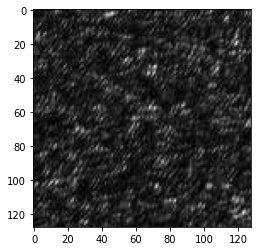

Tensor("Const_1:0", shape=(258, 128, 128), dtype=float32)
(258, 128, 128)


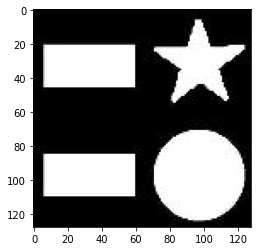

In [3]:
img_height = 128
img_width = 128

img_height_test = 128
img_width_test = 128

speckle_data = load('speckle_array_case1.npy')
# speckle_data = tf.constant(speckle_data, dtype=tf.uint8)
print(tf.constant(speckle_data))
print(speckle_data.shape)

plt.imshow(speckle_data[0], cmap='gray')
plt.show()

# speckle_labels = load('speckle_labels.npy')
speckle_labels = load('symbol_array_case1.npy')
# speckle_labels = tf.constant(speckle_labels, dtype=tf.uint8)
print(tf.constant(speckle_labels))
print(speckle_labels.shape)

plt.imshow(speckle_labels[0], cmap='gray')
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(speckle_data, speckle_labels, test_size=0.1, random_state=42)

X_train = X_train.reshape(-1, img_height, img_width, 1)
X_test = X_test.reshape(-1, img_height, img_width, 1)
input_shape = (img_height, img_width, 1)

y_train = y_train.reshape(-1, img_height_test, img_width_test, 1)
y_test = y_test.reshape(-1, img_height_test, img_width_test, 1)
input_shape_test = (img_height_test, img_width_test, 1)

In [1]:
# checkpoint
#checkpoint_filepath = 'weights.{epoch:02d}-{accuracy:.2f}.hdf5'
checkpoint_filepath = '/content/U-net-reconstruction/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_filepath)


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath,
                                                               save_weights_only = True,
                                                               verbose=1)

# reconstruction = build_model(input_shape, 16)
reconstruction = create_model_U(pretrained_weights = None, 
                                input_size = (128,128,1), 
                                start_neurons=32)

# Model weights are saved at the end of every epoch, if it's the best seen so far.
reconstruction.fit(X_train, y_train, 
                   batch_size = 50,
                   epochs = 200,
                   validation_data = (X_test, y_test),    
                   callbacks = [model_checkpoint_callback])

NameError: ignored

In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
print(latest)

NameError: ignored

In [ ]:
reconstruction.load_weights(checkpoint_filepath)

score = reconstruction.evaluate(X_test, y_test, verbose = 0)

print('Test loss:', score[0])
print('Test acuracy:', score[1]) 

NameError: ignored

In [ ]:
y_predicted = reconstruction.predict(X_test)

extract = Model(reconstruction.inputs, reconstruction.layers[-1].output) 
features = extract.predict(X_test)
print(features.shape)
save('features_data.npy', features)
save('features_predicted.npy', y_predicted)

reconstruction.save('reconstruction_model')